In [1]:
#MERGED DATA

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import utils

data = pd.read_csv('/Users/selinzobu/Desktop/TILES/111OMFITBASES111.csv', parse_dates = ['Timestamp'])
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
#fitbit["Timestamp"] = pd.to_datetime(fitbit["Timestamp"], utc=True)
#print(data.columns)

bases = pd.read_csv('/Users/selinzobu/Desktop/TILES/1BASESTRESSD.csv', parse_dates = ['Timestamp'])
bases = bases.loc[:, ~bases.columns.str.contains('^Unnamed')]

FOM = pd.read_csv('/Users/selinzobu/Desktop/TILES/1FITOMSTRESSD.csv', parse_dates = ['Timestamp'])
FOM = FOM.loc[:, ~FOM.columns.str.contains('^Unnamed')]

X = data.iloc[:,2:65]  #independent columns
y = data.iloc[:,-1]    #target column 

X_base = bases.drop(['participant_id', 'Timestamp', 'mstressd'], axis = 1)  #independent columns
y_base = bases['mstressd']    #target column 

X_FOM = FOM.drop(['participant_id', 'Timestamp', 'mstressd'], axis = 1)  #independent columns
y_FOM = FOM['mstressd']   #target column 

#for col in X.columns:
 #   X[col] = X[col].apply(pd.to_numeric, errors='coerce')

In [2]:
#before taking a pre-processing step we first need to split our dataset into training and 
#testing tests. The former will be used for model training and the latter for evaluating 
#the performance of the trained model.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_base, y_base, test_size=0.3, random_state=42)

XFOM_train, XFOM_test, yFOM_train, yFOM_test = train_test_split(
    X_FOM, y_FOM, test_size=0.3, random_state=42)

In [3]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape, 'y_train:', y_train.shape,'y_test:', y_test.shape)
#print(y_test.head())
print('Xb_train:', Xb_train.shape, 'Xb_test:', Xb_test.shape, 'yb_train:', yb_train.shape,'yb_test:', yb_test.shape)
#print(yb_test.head())
print('XFOM_train:', XFOM_train.shape, 'XFOM_test:', XFOM_test.shape, 'yFOM_train:', yFOM_train.shape,'yFOM_test:', yFOM_test.shape)
#print(yFOM_test.head())

X_train: (2092, 63) X_test: (897, 63) y_train: (2092,) y_test: (897,)
Xb_train: (5507, 29) Xb_test: (2361, 29) yb_train: (5507,) yb_test: (2361,)
XFOM_train: (2188, 34) XFOM_test: (938, 34) yFOM_train: (2188,) yFOM_test: (938,)


In [4]:
print('Merged columns:', len(X.columns))
print('Merged target:', len(y.unique()))
print('Base columns:', len(X_base.columns))
print('Base target:', len(y_base.unique()))
print('FOM columns:', len(X_FOM.columns))
print('FOM target:', len(y_FOM.unique()))

Merged columns: 63
Merged target: 9
Base columns: 29
Base target: 9
FOM columns: 34
FOM target: 9


In [5]:
# Normality test original data

from scipy import stats as scs

print(scs.shapiro(y))
print(scs.shapiro(X))
print(scs.shapiro(y_train))
print(scs.shapiro(X_train))
print(scs.shapiro(yb_train))
print(scs.shapiro(Xb_train))
print(scs.shapiro(yFOM_train))
print(scs.shapiro(XFOM_train))
print(scs.shapiro(y_test))
print(scs.shapiro(X_test))
print(scs.shapiro(yb_test))
print(scs.shapiro(Xb_test))
print(scs.shapiro(yFOM_test))
print(scs.shapiro(XFOM_test))

ShapiroResult(statistic=0.8583763241767883, pvalue=1.401298464324817e-45)
ShapiroResult(statistic=0.12957018613815308, pvalue=0.0)
ShapiroResult(statistic=0.8550655245780945, pvalue=3.4487636765190938e-40)
ShapiroResult(statistic=0.12922745943069458, pvalue=0.0)
ShapiroResult(statistic=0.8171676993370056, pvalue=0.0)
ShapiroResult(statistic=0.6907700300216675, pvalue=0.0)
ShapiroResult(statistic=0.8539082407951355, pvalue=4.910289948840591e-41)
ShapiroResult(statistic=0.19255787134170532, pvalue=0.0)
ShapiroResult(statistic=0.8638865947723389, pvalue=3.5548703209562825e-27)
ShapiroResult(statistic=0.13034987449645996, pvalue=0.0)
ShapiroResult(statistic=0.8181965947151184, pvalue=1.401298464324817e-45)
ShapiroResult(statistic=0.6898342370986938, pvalue=0.0)
ShapiroResult(statistic=0.8607083559036255, pvalue=5.133230191988882e-28)
ShapiroResult(statistic=0.19174766540527344, pvalue=0.0)


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [6]:
#!pip install BorutaShap 1
from BorutaShap import BorutaShap

In [7]:
#BorutaShap 2
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

In [8]:
#BorutaShap 3 BASELINE
Feature_Selector.fit(X=Xb_train, y=yb_train, n_trials=100, sample=False,
                     train_or_test = 'test', normalize=True, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

11 attributes confirmed important: ['rand_EmotionalWellbeing', 'ocb', 'pcq_Hope', 'mpfi_Flexibility_Defusion', 'mpfi_Flexibility_SelfAsContext', 'iod_ID', 'mpfi_Flexibility_PresentMomentAwareness', 'swls', 'chss_ChallengeStressors', 'stai', 'pan_NegAffect']
18 attributes confirmed unimportant: ['rand_PhysicalFunctioning', 'mpfi_Flexibility_CommittedAction', 'mpfi_Flexibility', 'pan_PosAffect', 'pcq', 'irb', 'itp', 'pcq_Efficacy', 'rand_LimitsEmotionalProblems', 'iod_OD', 'chss_HindranceStressors', 'mpfi_Flexibility_Values', 'pcq_Optimism', 'rand_SocialFunctioning', 'mpfi_Flexibility_Acceptance', 'rand_LimitsPhysicalHealth', 'pss', 'pcq_Resilience']
0 tentative attributes remains: []


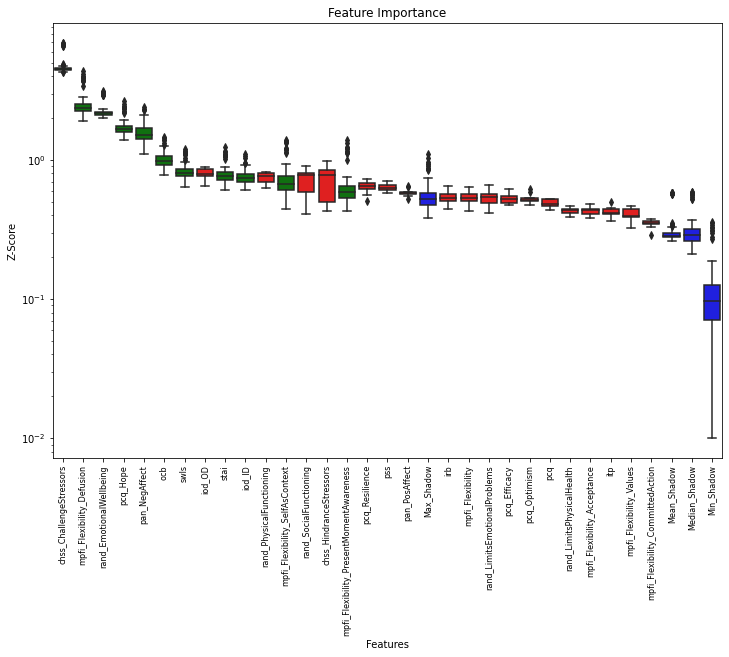

In [9]:
# BorutaShap 4- Returns Boxplot of features
Feature_Selector.plot(which_features='all')

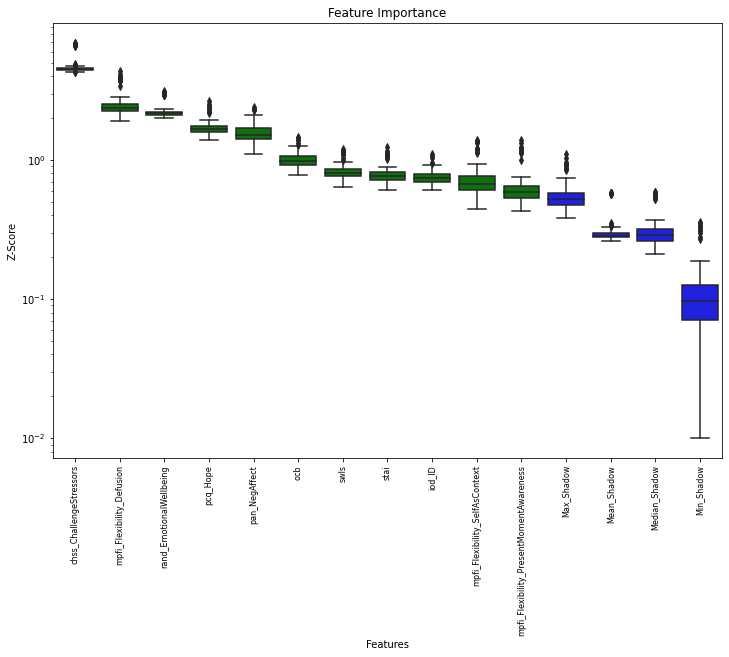

In [10]:
Feature_Selector.plot(which_features='accepted' )

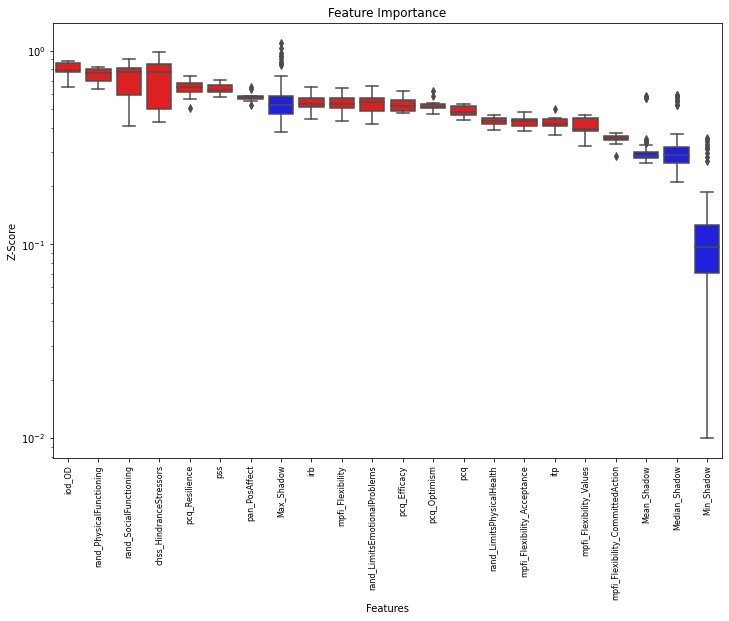

In [8]:
Feature_Selector.plot(which_features='rejected')

In [11]:
## BORUTA

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
import pandas as pd
import numpy as np

In [12]:
# let's initialize a RF model 
model = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)

#model.fit(X_train, y_train)
model.fit(Xb_train, yb_train)
#model.fit(XFOM_train, yFOM_train)

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42)

In [13]:
# let's initialize Boruta
feat_selector = BorutaPy(
    verbose=3,
    estimator=model,
    n_estimators='auto',
    max_iter=20  # number of iterations to perform
)

In [14]:
# train Boruta
# N.B.: X_train and y_train must be numpy arrays
borres = feat_selector.fit(np.array(Xb_train), np.array(yb_train))

Iteration: 	1 / 20
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	2 / 20
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	3 / 20
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	4 / 20
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	5 / 20
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	6 / 20
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	7 / 20
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	8 / 20
Confirmed: 	23
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 20
Confirmed: 	23
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 20
Confirmed: 	23
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 20
Confirmed: 	23
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 20
Confirmed: 	24
Tentative: 	5
Rejected: 	0
Iteration: 	13 / 20
Confirmed: 	24
Tentative: 	5
Rejected: 	0
Iteration: 	14 / 20
Confirmed: 	24
Tentative: 	5
Rejected: 	0
Iteration: 	15 / 20
Confirmed: 	24
Tentative: 	5
Rejected: 	0
Iteration: 	16 / 20
Confirmed: 	24
Tentative: 	5
Rejected: 	0
Iteration: 	17 / 

In [15]:
# check selected features
print(feat_selector.support_)

# check ranking of features
print(feat_selector.ranking_)

# call transform() on X to filter it down to selected features
#X_filtered = feat_selector.transform(X)

[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True False False  True  True
 False  True  True  True  True]
[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 5 4 1 1 3 1 1 1 1]


In [16]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(Xb_train.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))


accepted = []

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
    if feat[2] == True:
        accepted.append(feat[0])

Feature: iod_ID                    Rank: 1,  Keep: True
Feature: iod_OD                    Rank: 1,  Keep: True
Feature: ocb                       Rank: 1,  Keep: True
Feature: irb                       Rank: 1,  Keep: True
Feature: itp                       Rank: 2,  Keep: False
Feature: pan_PosAffect             Rank: 1,  Keep: True
Feature: pan_NegAffect             Rank: 1,  Keep: True
Feature: stai                      Rank: 1,  Keep: True
Feature: rand_PhysicalFunctioning  Rank: 1,  Keep: True
Feature: rand_LimitsPhysicalHealth Rank: 1,  Keep: True
Feature: rand_LimitsEmotionalProblems Rank: 1,  Keep: True
Feature: rand_EmotionalWellbeing   Rank: 1,  Keep: True
Feature: rand_SocialFunctioning    Rank: 1,  Keep: True
Feature: swls                      Rank: 1,  Keep: True
Feature: pss                       Rank: 1,  Keep: True
Feature: mpfi_Flexibility          Rank: 1,  Keep: True
Feature: mpfi_Flexibility_Acceptance Rank: 2,  Keep: False
Feature: mpfi_Flexibility_PresentMomentAw

In [17]:
print(len(accepted))
print((accepted))

24
['iod_ID', 'iod_OD', 'ocb', 'irb', 'pan_PosAffect', 'pan_NegAffect', 'stai', 'rand_PhysicalFunctioning', 'rand_LimitsPhysicalHealth', 'rand_LimitsEmotionalProblems', 'rand_EmotionalWellbeing', 'rand_SocialFunctioning', 'swls', 'pss', 'mpfi_Flexibility', 'mpfi_Flexibility_PresentMomentAwareness', 'mpfi_Flexibility_SelfAsContext', 'mpfi_Flexibility_Defusion', 'pcq', 'pcq_Hope', 'pcq_Resilience', 'pcq_Optimism', 'chss_ChallengeStressors', 'chss_HindranceStressors']


In [18]:
# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", Xb_train.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              Xb_train.columns[i], " - Ranking: ", feat_selector.ranking_[i])


------Support and Ranking for each feature------
Passes the test:  iod_ID  - Ranking:  1
Passes the test:  iod_OD  - Ranking:  1
Passes the test:  ocb  - Ranking:  1
Passes the test:  irb  - Ranking:  1
Doesn't pass the test:  itp  - Ranking:  2
Passes the test:  pan_PosAffect  - Ranking:  1
Passes the test:  pan_NegAffect  - Ranking:  1
Passes the test:  stai  - Ranking:  1
Passes the test:  rand_PhysicalFunctioning  - Ranking:  1
Passes the test:  rand_LimitsPhysicalHealth  - Ranking:  1
Passes the test:  rand_LimitsEmotionalProblems  - Ranking:  1
Passes the test:  rand_EmotionalWellbeing  - Ranking:  1
Passes the test:  rand_SocialFunctioning  - Ranking:  1
Passes the test:  swls  - Ranking:  1
Passes the test:  pss  - Ranking:  1
Passes the test:  mpfi_Flexibility  - Ranking:  1
Doesn't pass the test:  mpfi_Flexibility_Acceptance  - Ranking:  2
Passes the test:  mpfi_Flexibility_PresentMomentAwareness  - Ranking:  1
Passes the test:  mpfi_Flexibility_SelfAsContext  - Ranking:  1


In [40]:
#.transform()method

In [19]:
#Permutation Feature Importance for ML Interpretability

#The permutation feature importance is defined to be the decrease in a model score when a
#single feature value is randomly shuffled [1]. This procedure breaks the relationship 
#between the feature and the target, thus the drop in the model score is indicative of how
#much the model depends on the feature.

from sklearn.ensemble import RandomForestRegressor

# Instantiate a Random Forest Regressor
regr = RandomForestRegressor(max_depth=100, random_state=0)
# Fit a random forest regressor
regr.fit(Xb_train, yb_train)

#At this point, feel free to take some time to tune the hyperparameters of your random 
#forest regressor. But, since this isn’t a guide on hyperparameter tuning, I am going to 
#continue with this naive random forest model — it’ll be fine for illustrating the 
#usefulness of permutation feature importance.


RandomForestRegressor(max_depth=100, random_state=0)

In [20]:
#Let’s calculate the RMSE of our model predictions and store it as rmse_full_mod.

from sklearn.metrics import mean_squared_error
rmse_full_mod = mean_squared_error(regr.predict(Xb_test), yb_test, squared = False)

In [21]:
#Now, we can implement permutation feature importance by shuffling each predictor and 
#recording the increase in RMSE. This will allow us to assess which predictors are useful 
#for making predictions. 

# Initialize a list of results
results = []
# Iterate through each predictor
for predictor in Xb_test:
    
    # Create a copy of X_test
    Xb_test_copy = Xb_test.copy()
    
    # Scramble the values of the given predictor
    Xb_test_copy[predictor] = Xb_test[predictor].sample(frac=1).values
    
    # Calculate the new RMSE
    new_rmse = mean_squared_error(regr.predict(Xb_test_copy), yb_test,
                                  squared = False)
    
    # Append the increase in MSE to the list of results 
    results.append({'pred': predictor,
                    'score': new_rmse - rmse_full_mod })
# Convert to a pandas dataframe and rank the predictors by score
resultsdf = pd.DataFrame(results).sort_values(by = 'score',
                                              ascending = False)

In [22]:
resultsdf[0:10]

,pred,score
27,chss_ChallengeStressors,0.081365
11,rand_EmotionalWellbeing,0.018867
0,iod_ID,0.012296
6,pan_NegAffect,0.010409
19,mpfi_Flexibility_Defusion,0.007926
17,mpfi_Flexibility_PresentMomentAwareness,0.005132
13,swls,0.002981
5,pan_PosAffect,0.002185
7,stai,0.002070
23,pcq_Hope,0.001661


In [23]:
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# plot feature importance
#pyplot.bar([x for x in range(len(resultsdf))], resultsdf)
#pyplot.show()
pos = []
importance = results
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))

Feature: 0  Score: {'pred': 'iod_ID', 'score': 0.012295933390838343}
Feature: 1  Score: {'pred': 'iod_OD', 'score': -0.0001032478857585506}
Feature: 2  Score: {'pred': 'ocb', 'score': 0.0010238287451780348}
Feature: 3  Score: {'pred': 'irb', 'score': -0.00018521704771179426}
Feature: 4  Score: {'pred': 'itp', 'score': -4.596248512345191e-06}
Feature: 5  Score: {'pred': 'pan_PosAffect', 'score': 0.0021853610197820617}
Feature: 6  Score: {'pred': 'pan_NegAffect', 'score': 0.010408507882830542}
Feature: 7  Score: {'pred': 'stai', 'score': 0.0020697531133687663}
Feature: 8  Score: {'pred': 'rand_PhysicalFunctioning', 'score': -3.095964783672578e-05}
Feature: 9  Score: {'pred': 'rand_LimitsPhysicalHealth', 'score': 0.000590202197978118}
Feature: 10  Score: {'pred': 'rand_LimitsEmotionalProblems', 'score': 0.0002661582017963182}
Feature: 11  Score: {'pred': 'rand_EmotionalWellbeing', 'score': 0.018866979561891983}
Feature: 12  Score: {'pred': 'rand_SocialFunctioning', 'score': 6.179970502906

In [24]:
#Correlation Feature Selection

#selecting the top k most relevant features (largest values) via the SelectKBest class.
#define the SelectKBest class to use the f_regression() function and select all features,
#then transform the train and test sets.

#The scikit-learn machine library provides an implementation of the correlation statistic 
#in the f_regression() function. This function can be used in a feature selection strategy

from sklearn.feature_selection import SelectKBest, f_regression

# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fit = fs.fit(Xb_train, yb_train)
# transform train input data
Xb_train_fs = fs.transform(Xb_train)
# transform test input data
Xb_test_fs = fs.transform(Xb_test)
#print(X_train_fs, X_test_fs, fs)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xb_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                                      Specs       Score
11                  rand_EmotionalWellbeing  197.211046
14                                      pss  181.259380
6                             pan_NegAffect  179.935721
19                mpfi_Flexibility_Defusion  172.929522
7                                      stai  131.165637
18           mpfi_Flexibility_SelfAsContext  124.451545
27                  chss_ChallengeStressors  110.103876
26                             pcq_Optimism  105.204391
15                         mpfi_Flexibility   94.440110
10             rand_LimitsEmotionalProblems   78.850913
12                   rand_SocialFunctioning   72.036514
20                  mpfi_Flexibility_Values   66.428783
23                                 pcq_Hope   61.379715
1                                    iod_OD   46.859730
22                                      pcq   46.399267
17  mpfi_Flexibility_PresentMomentAwareness   44.603216
5                             pan_PosAffect   39

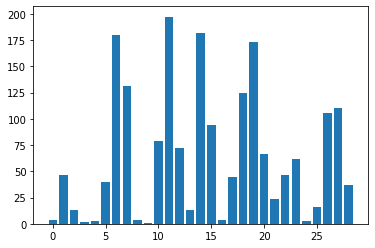

In [25]:
# what are scores for the features
#for i in range(len(fs.scores_)):
	#print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [26]:
#Step 3: Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xb_train_scaled = scaler.fit_transform(Xb_train)
Xb_test_scaled = scaler.transform(Xb_test)

print(Xb_train_scaled, Xb_test_scaled)

[[-4.11214399e-01 -7.47883688e-01 -2.09081754e+00 ...  1.33291775e-01
  -2.12032756e+00 -8.25792273e-01]
 [-7.86545085e-01 -7.47883688e-01 -1.12558214e+00 ...  1.33291775e-01
  -9.05369483e-01  4.06199334e-01]
 [-2.23549056e-01 -7.47883688e-01  5.25822807e-04 ... -4.30052664e-01
   1.32205366e+00  1.81418974e+00]
 ...
 [ 1.27777369e+00 -7.47883688e-01  1.68968777e+00 ...  1.25998065e+00
  -9.53974319e-02 -1.35378868e+00]
 [-7.86545085e-01 -3.00550629e-01 -8.84273294e-01 ...  1.33291775e-01
  -1.31035551e+00 -1.35378868e+00]
 [-7.86545085e-01 -4.49661649e-01 -1.20601843e+00 ...  1.33291775e-01
   1.07095581e-01 -8.25792273e-01]] [[ 1.27777369 -0.74788369  1.28750636 ...  0.13329177  0.30958859
   1.81418974]
 [-0.59887974 -0.00232859  0.08096211 ... -1.55674154 -0.70287647
  -1.35378868]
 [-0.78654509  0.59411549  0.24183467 ...  0.13329177 -1.91783455
  -0.64979347]
 ...
 [-0.78654509  0.59411549  0.24183467 ...  0.13329177 -1.91783455
  -0.64979347]
 [ 0.15178163 -0.74788369 -0.803837

In [27]:
#Step 4: Apply Dimensionality Reduction using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xb_train_dim_red = pca.fit_transform(Xb_train_scaled)
Xb_test_dim_red = pca.transform(Xb_test_scaled)

print(Xb_train_dim_red, Xb_test_dim_red)
explained_variance = pca.explained_variance_ratio_
print('explained_variance:', explained_variance)

[[-1.32646149 -2.41734951]
 [-0.75993921 -0.41621916]
 [-2.16142909  1.63786675]
 ...
 [-4.70639794 -0.36072149]
 [-1.38467295 -1.39135365]
 [-1.83176794 -1.12843606]] [[ 0.28396305  0.83343153]
 [ 1.40951493 -2.09723062]
 [ 2.81580152  3.01109548]
 ...
 [ 2.81580152  3.01109548]
 [-4.03048479 -1.88531609]
 [ 0.28396305  0.83343153]]
explained_variance: [0.3158278  0.09131709]


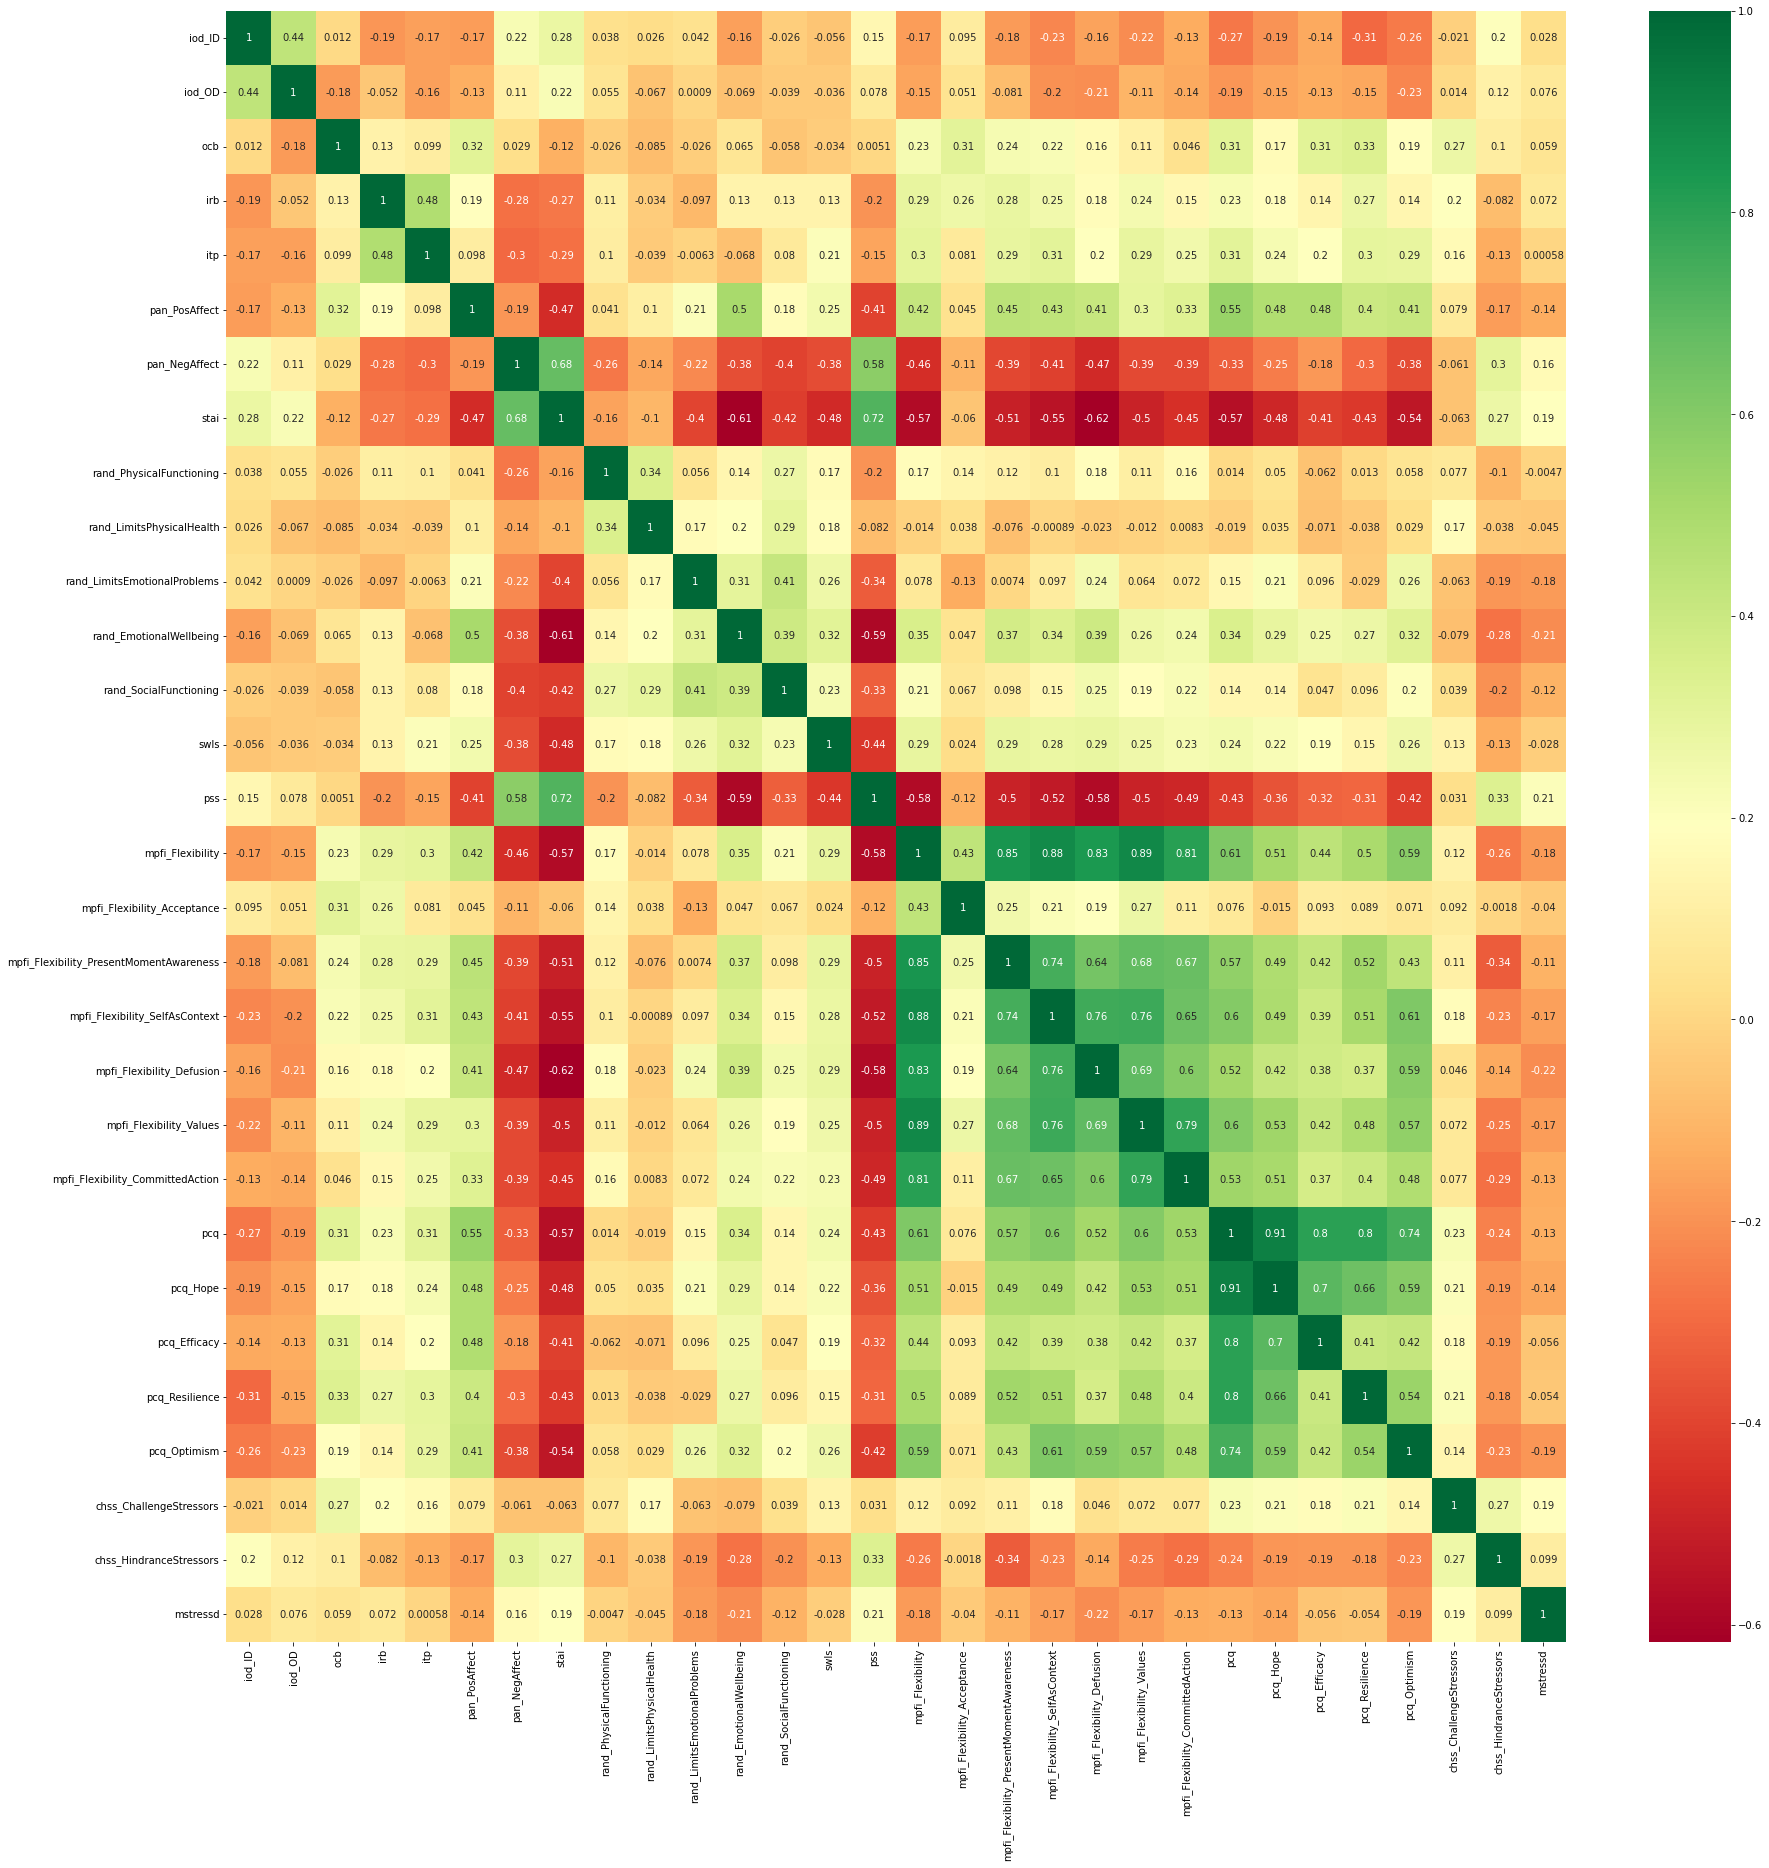

In [31]:
#Heatmap makes it easy to identify which features are most related to the target variable,
#we will plot heatmap of correlated features using the seaborn library.

import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = bases.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
#!pip install boruta
#Note: Standardization is only applicable on the data values that follows Normal 
#Distribution.
#Two most popular feature scaling techniques are:

#Z-Score Standardization
#Min-Max Normalization
#In statistics and machine learning, min-max normalization of data is a process of 
#converting original range of data to the range between 0 and 1.

'''
The main idea behind normalization/standardization is always the same. Variables that are 
measured at different scales do not contribute equally to the model fitting & model learned 
function and might end up creating a bias. Thus, to deal with this potential problem 
feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

Note: Tree-based models are usually not dependent on scaling, but non-tree models models 
such as SVM, LDA etc. are often hugely dependent on it.

One important thing to keep in mind when using the MinMax Scaling is that it is highly 
influenced by the maximum and minimum values in our data so if our data contains outliers 
it is going to be biased.

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. 
This is done feature-wise in an independent way.

Recommended way: Use the RobustScaler that will just scale the features but in this case 
using statistics that are robust to outliers. This scaler removes the median and scales the
data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the
range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

normalize() or StandardScaler() from sklearn won’t change the shape of your data.

normalisation > the main difference here is that it will present numbers between 0 and 1 
(but it won’t center the data on mean 0 and std =1).

Including very large and very small numbers in a regression can lead to computational
problems. When you normalize or standardize, you mitigate the problem.


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df)

print(normalized_data)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)

'''

'from sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\n\nnormalized_data = scaler.fit_transform(df)\n\nprint(normalized_data)'

In [32]:
print(y.value_counts())

1.0    1110
2.0     782
3.0     553
1.5     199
2.5     190
4.0      90
3.5      47
5.0      16
4.5       2
Name: mstressd, dtype: int64


In [33]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[2 0 0 ... 0 0 0]


In [ ]:
'''Now that we have identified the features to drop, we can confidently drop them and 
proceed with our normal routine. You can even use the .transform()method to automatically 
drop them. You may want to try other feature selection methods to suit your needs, but 
Boruta uses one of the most powerful algorithms out there, and is quick and easy to use.'''

#https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a

In [ ]:
###Converting series to dataframes
columns = ohe.get_feature_names(input_features=X_train_cat.columns)
X_train_processed = pd.DataFrame(X_train_ohe.todense(), 
columns=columns)
X_test_processed = pd.DataFrame(X_test_ohe.todense(), columns=columns)
###Instantiating Standard Scaler
ss = StandardScaler()
###Converting continuous feature values to floats
X_train_cont = X_train[cont_features].astype(float)
X_test_cont = X_test[cont_features].astype(float)
###Fitting scaler to training continuous features and transforming ###train and test
X_train_scaled = ss.fit_transform(X_train_cont)
X_test_scaled = ss.transform(X_test_cont)
###Concatenating scaled and encoded dataframes
X_train_a2 = pd.concat([pd.DataFrame(X_train_scaled), X_train_processed], axis=1)
X_test_a2 = pd.concat([pd.DataFrame(X_test_scaled), X_test_processed], axis=1)

#https://towardsdatascience.com/feature-selection-with-borutapy-f0ea84c9366

In [ ]:
#!pip install featurewiz